
# Predicting the Sale Price of Bulldozers

Going through an example machine learning project

## 1. Problem definition

> How well can we predict the future bulldozer sale price?

## 2. Data

> Data downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data?select=Machine_Appendix.csv

There are three main data sets:
    
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
## 3. Evaluation

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note:** The goal for most regression evaluation metrics is to minimise the error

## 4. Features
Kaggle provides a data dictionary in a xlsx format.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_log_error

In [16]:
# Import training and validation sets
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [18]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

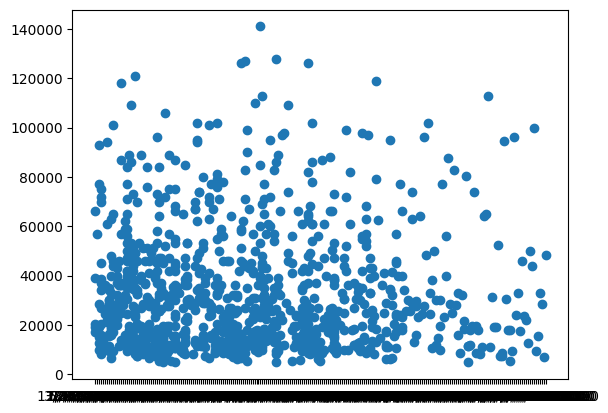

In [19]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

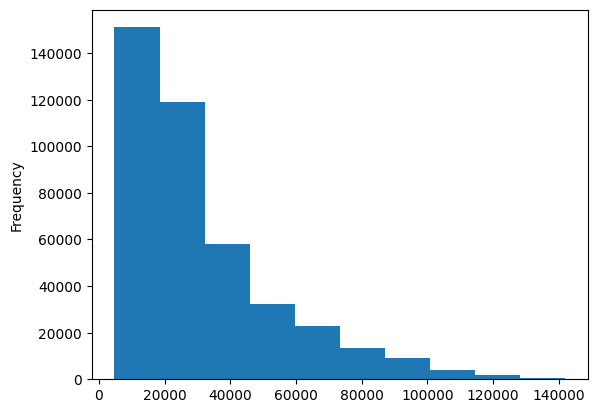

In [20]:
df["SalePrice"].plot.hist()

In [21]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [22]:
pd.read_excel("data/Data Dictionary.xlsx")

/home/kis619/projects/sample/env/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Variable,Description,Unnamed: 2
0,SalesID,unique identifier of a particular sale of a ...,NaN
1,MachineID,identifier for a particular machine; machin...,NaN
2,ModelID,identifier for a unique machine model (i.e. ...,NaN
3,datasource,source of the sale record; some sources are...,NaN
4,auctioneerID,"identifier of a particular auctioneer, i.e. ...",NaN
5,YearMade,year of manufacturer of the Machine,NaN
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...,NaN
7,UsageBand,"value (low, medium, high) calculated compari...",NaN
8,Saledate,time of sale,NaN
9,Saleprice,cost of sale in USD,NaN


### Parsing dates
Time series data - enrich the time and date component as much as possible
Tell panda which of the columns have dates it them using the datetime object in pandas

In [23]:
# Import data again but this time parse data
df = pd.read_csv("data/TrainAndValid.csv",
                 low_memory=False,
                parse_dates=["saledate"])

In [24]:
df["saledate"].dtype

dtype('<M8[ns]')

In [25]:
df["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

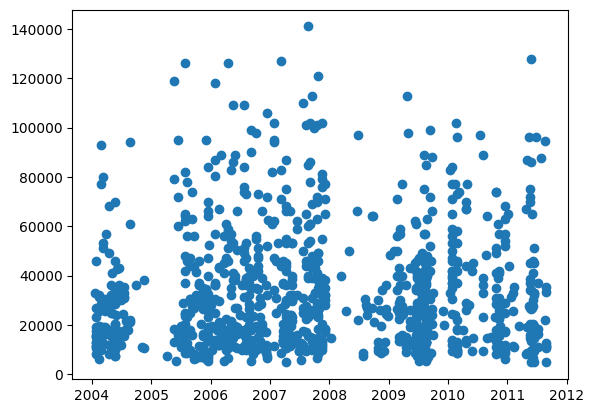

In [26]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [27]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

In [28]:
df.sort_values(by=["saledate"], inplace=True)

### Make a copy of the original DF

In [29]:
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [30]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year

In [31]:
df_tmp["saleMonth"] = df_tmp.saledate.dt.month

In [32]:
df_tmp["saleDay"] = df_tmp.saledate.dt.day

In [33]:
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week

In [34]:
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.day_of_year

In [35]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [36]:
# DF has been enriched so saledate is redundant and will be dropped
df_tmp.drop("saledate", axis=1, inplace=True)

In [37]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Missing values and numeric data

In [38]:
### Convert string to categories

In [39]:
pd.api.types.is_object_dtype(df_tmp["UsageBand"]), df_tmp["UsageBand"].dtype.name

(True, 'object')

In [40]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content) or content.dtype.name == "object":
        df_tmp[label] = content.astype("category")

In [41]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [42]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [43]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [44]:
df_tmp.isnull().sum() / len(df_tmp) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [45]:
# # Export current tmp dataframe
# df_tmp.to_csv("data/train_valid_tmp.csv")

In [46]:
# Import preprocessed data
# df_tmp = pd.read_csv("data/train_valid_tmp.csv", low_memory=False)

In [47]:
# for label, content in df_tmp.items():
#     if pd.api.types.is_string_dtype(content) or content.dtype.name == "object":
#         df_tmp[label] = content.astype("category")

## 5.1 Filling missing numeric values

In [48]:
for label, content in df_tmp.items():
    
    if pd.api.types.is_numeric_dtype(content) and content.isna().sum():
        print(label)
        df_tmp[label+"_is_missing"] = content.isna()
        df_tmp[label] = content.fillna(content.median())

auctioneerID
MachineHoursCurrentMeter


In [49]:
df_tmp["MachineHoursCurrentMeter"]

205615    0.0
274835    0.0
141296    0.0
212552    0.0
62755     0.0
         ... 
410879    0.0
412476    0.0
411927    0.0
407124    0.0
409203    0.0
Name: MachineHoursCurrentMeter, Length: 412698, dtype: float64

In [50]:
df_tmp["MachineHoursCurrentMeter_is_missing"].value_counts()

MachineHoursCurrentMeter_is_missing
True     265194
False    147504
Name: count, dtype: int64

In [51]:
df_tmp["auctioneerID_is_missing"].value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [52]:
df_tmp[['auctioneerID', 'auctioneerID_is_missing']]


,auctioneerID,auctioneerID_is_missing
205615,18.0,False
274835,99.0,False
141296,99.0,False
212552,99.0,False
62755,99.0,False
...,...,...
410879,99.0,False
412476,99.0,False
411927,99.0,False
407124,99.0,False


## 5.2 FIlling missing categorical values

In [53]:
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        df_tmp[label+"_is_missing"] = content.isna()
        df_tmp[label] = pd.Categorical(content).codes + 1


In [54]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [55]:
df_tmp.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True,...,False,True,True,False,True,True,True,True,True,False


In [56]:
(df_tmp.isna().sum() == 0).all()

True

## 6. Modelling

In [84]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp["SalePrice"]

model.fit(X, y)
# for label, content in df_tmp.items():
#     print(content.dtype)


CPU times: user 13min 46s, sys: 4.08 s, total: 13min 50s
Wall time: 13min 57s


RandomForestRegressor(random_state=42)

In [226]:
model.score(X, y) # Fake testing on set it was trained on

0.9875468079970562

## ME figuring out how to test on the provided test set

**_______________________________________________________________________**

In [57]:
X_test = pd.read_csv("data/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
y_preds = pd.read_csv("data/test_predictions.csv")

In [58]:
X_test["saleYear"] = X_test.saledate.dt.year
X_test["saleMonth"] = X_test.saledate.dt.month
X_test["saleDay"] = X_test.saledate.dt.day
X_test["saleDayOfWeek"] = X_test.saledate.dt.day_of_week
X_test["saleDayofYear"] = X_test.saledate.dt.day_of_year
X_test.drop("saledate", axis=1, inplace=True)

In [59]:
for label, content in X_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            X_test[label + "_is_missing"] = content.isna()
            X_test[label] = content.fillna(content.median())
        

In [60]:
for label, content in X_test.items():
    if content.dtype.name == "object":
        X_test[label] = content.astype("category")

In [61]:
for label, content in X_test.items():
    if pd.api.types.is_categorical_dtype(content):
        if content.isna().sum():
            X_test[label + "_is_missing"] = content.isna()
        X_test[label] = pd.Categorical(content).codes + 1

        

In [62]:
columns_set1 = set(X_test.columns)
columns_set2 = set(X.columns)
columns_unique_to_set1 = columns_set1 - columns_set2
columns_unique_to_set2 = columns_set2 - columns_set1

NameError: name 'X' is not defined

In [190]:
for column in columns_unique_to_set2:
    X_test[column] = False

In [192]:
X_test.shape, X.shape

((12457, 102), (412698, 102))

In [224]:
X_test_reordered = X_test.reindex(columns=X.columns)
X_test_reordered.shape

my_preds = model.predict(X_test_reordered)
model.score(X_test_reordered, y_preds["SalesPrice"])

0.6185732846734606

In [206]:
len(my_preds)

12457

In [213]:
y_preds[12452:]

,SalesID,SalesPrice
12452,6643171,41054.516218
12453,6643173,12797.929101
12454,6643184,18321.651967
12455,6643186,17611.805219
12456,6643196,29852.764949


In [210]:
my_preds[:5]

array([20649. , 15767.5, 49266. , 85590. , 62601. ])

In [223]:
from sklearn.metrics import r2_score, mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(my_preds, y_preds["SalesPrice"]))
r2 = r2_score(my_preds, y_preds["SalesPrice"])
rmsle, r2

(0.3874297748880871, 0.784290093859297)

**_______________________________________________________________________**
**_______________________________________________________________________**
**_______________________________________________________________________**
**_______________________________________________________________________**

## Splitting data

In [63]:
X_train = (df_tmp[df_tmp["saleYear"] < 2012]).drop("SalePrice", axis=1)
y_train = (df_tmp[df_tmp["saleYear"] < 2012])["SalePrice"]
X_valid = (df_tmp[df_tmp["saleYear"] >= 2012]).drop("SalePrice", axis=1)
y_valid = (df_tmp[df_tmp["saleYear"] >= 2012])["SalePrice"]
len(X_train), len(y_train), len(X_valid), len(y_valid)

(401125, 401125, 11573, 11573)

In [64]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [65]:
# Create an evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_true, y_pred):
    """Calculates root mean squared log error
    y_true: true labels
    y_pred: predictions"""
    return np.sqrt(mean_squared_log_error(y_true, y_pred))



In [66]:
# Create broader eval functions
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing model on subset (to tune the hyperparameters)

In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, max_samples=10000)

In [70]:
%%time
model.fit(X_train, y_train)

CPU times: user 26.7 s, sys: 183 ms, total: 26.9 s
Wall time: 27 s


RandomForestRegressor(max_samples=10000, random_state=42)

In [73]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(estimator=model,
                              random_state=42,
                              cv=5,
                              param_distributions=rs_grid,
                              n_iter=2,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000,
                                                   random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [75]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [76]:
show_scores(rs_model)

{'Training MAE': 8891.655193695899,
 'Valid MAE': 11313.549827603976,
 'Training RMSLE': 0.39237058829152377,
 'Valid RMSLE': 0.4484052255971633,
 'Training R^2': 0.6825547447927643,
 'Valid R^2': 0.6361784117343763}

### Train with ideal hyperparameters 
**got from ztm video**

In [77]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=.5,
                                    max_samples=None,
                                    random_state=42)
ideal_model.fit(X_train, y_train)

CPU times: user 2min 49s, sys: 1.05 s, total: 2min 50s
Wall time: 2min 54s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      random_state=42)

In [78]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

## Make predicitons on the test data

In [100]:
df_test = pd.read_csv("data/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [80]:
# mkae predictions on data set
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


### Preprocessing the data (getting the test data in the same format as the data we trained on)

In [107]:
df_test = pd.read_csv("data/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()
def preprocess_data(df):
    """Performs transformations on df and returns thransformed df"""
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayofYear"] = df.saledate.dt.day_of_year
    df.drop("saledate", axis=1, inplace=True)
    
    for label, content in df_test.items():
        if pd.api.types.is_numeric_dtype(content) and content.isna().sum():
#             print(label)
            df[label+"_is_missing"] = content.isna()
            df[label] = content.fillna(content.median())

        elif content.dtype.name == "object" :
#             print(label)
#             if content.isna().sum():
            df[label+"_is_missing"] = content.isna()
            df[label] = pd.Categorical(content).codes + 1
#         else:
#             print("wtf")
#             print(content.dtype.name)

    return df

In [108]:
df_test = preprocess_data(df_test)
df_test.shape

(12457, 101)

In [109]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [110]:
df_test["auctioneerID_is_missing"] = False

In [111]:
df_test.shape

(12457, 102)

In [114]:
df_test = df_test.reindex(columns=X_train.columns)
test_preds = ideal_model.predict(df_test)

In [117]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

In [118]:
rmsle = np.sqrt(mean_squared_log_error(test_preds, y_preds["SalesPrice"]))
rmsle

0.2913036183142083

In [121]:
df_preds = pd.DataFrame({"SalesId": df_test.SalesID, "SalesPrice": test_preds})
df_preds

,SalesId,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [123]:
df_preds.to_csv("data/my_predictions", index=False)

### Feature Importance

<BarContainer object of 102 artists>

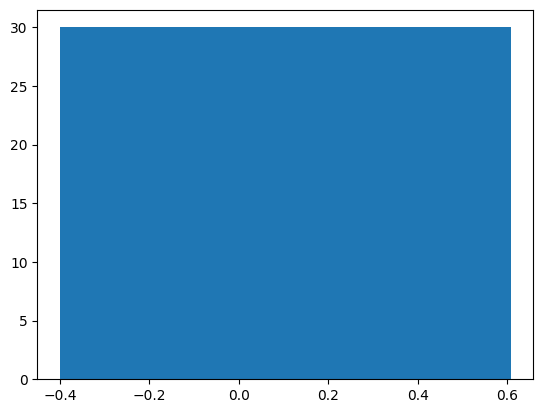

In [127]:
plt.bar(ideal_model.feature_importances_, height=30)

In [140]:
def plot_feature_importance(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importances")
    ax.invert_yaxis()

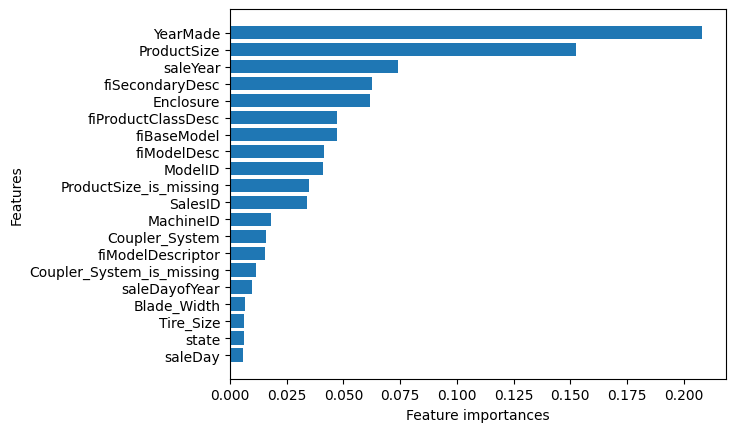

In [141]:
plot_feature_importance(X_train.columns, ideal_model.feature_importances_)